In [1]:
import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from sklearn.model_selection import train_test_split
import pandas as pd

### CLIP IMPORT

In [2]:
device = 'cuda'

In [3]:
import open_clip

model_type = 'ViT-H-14'

vlmodel, preprocess_train, feature_extractor = open_clip.create_model_and_transforms(
    'ViT-H-14', pretrained = '/home/ubuntu/Downloads/open_clip_pytorch_model.bin', device = device
)

/home/ubuntu/.conda/envs/visual_decoding/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Get single image_feature

In [31]:
class ImageFeatureDataset(Dataset):
    def __init__(self, image_folderpath, vlmodel, preprocess_train, device,):
        self.image_folderpath = image_folderpath
        self.vlmodel = vlmodel
        self.preprocess_train = preprocess_train

        self.image_feature_list, self.image_label_list = self.Image_feature()

    def __len__(self):
        return len(self.image_label_list)

    def __getitem__(self, idx):
        feature = self.image_feature_list[idx]
        label = self.image_label_list[idx]

        label = torch.tensor(int(label), dtype=torch.long)

        feature = feature.to(self.device)
        label = label.to(self.device)

        return feature, label

    def Image_feature(self):
        image_list = []
        image_label_list = []
        image_feature_list = []

        image_dir_list = os.listdir(self.image_folderpath)
        image_dir_list.sort()

        for image_dir in image_dir_list:
            image = Image.open(os.path.join(self.image_folderpath, image_dir)).convert("RGBA")
            image_label = image_dir.split(".")[0]
            image_label_list.append(image_label)
            image_list.append(image)

        image_inputs = torch.stack([self.preprocess_train(img) for img in image_list])
        image_inputs = image_inputs.to(device='cuda')

        with torch.no_grad():
            batch_image_features = self.vlmodel.encode_image(image_inputs)  # [batch_size, 1024]
            batch_image_features /= batch_image_features.norm(dim=-1, keepdim=True)

        image_feature_list.append(batch_image_features)

        image_feature_list = torch.cat(image_feature_list, dim=0)

        return image_feature_list, image_label_list
    
Image_feature_dataset = ImageFeatureDataset(image_folderpath = "/media/ubuntu/sda/data/trigger/nat_image_detection/nat_image_mask", vlmodel=vlmodel, preprocess_train=preprocess_train, device='cuda')

In [32]:
def Image_feature(image_folderpath, vlmodel, preprocess_train):
        import os
        image_list = []
        image_label_list = []
        image_feature_list = []

        image_dir_list = os.listdir(image_folderpath)
        image_dir_list = sorted(image_dir_list, key=lambda x: int(os.path.splitext(x)[0]))
        print(image_dir_list)

        for image_dir in image_dir_list:
            image = Image.open(os.path.join(image_folderpath, image_dir)).convert("RGBA")
            image_label = image_dir.split(".")[0]
            image_label_list.append(image_label)
            image_list.append(image)

        image_inputs = torch.stack([preprocess_train(img) for img in image_list])
        image_inputs = image_inputs.to(device='cuda')

        with torch.no_grad():
            batch_image_features = vlmodel.encode_image(image_inputs)  # [batch_size, 1024]
            batch_image_features /= batch_image_features.norm(dim=-1, keepdim=True)

        image_feature_list.append(batch_image_features)

        image_feature_list = torch.cat(image_feature_list, dim=0)

        return image_feature_list, image_label_list

In [33]:
image_feature_list, image_label_list = Image_feature("/media/ubuntu/sda/data/trigger/NaturalImages_new_2", vlmodel=vlmodel, preprocess_train=preprocess_train)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '101.jp

In [34]:
image_feature_list_split, image_label_list = Image_feature("/media/ubuntu/sda/data/trigger/nat_image_detection/nat_image_mask", vlmodel=vlmodel, preprocess_train=preprocess_train)

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.jpg', '18.png', '19.png', '20.png', '21.jpg', '22.png', '23.png', '24.png', '25.png', '26.png', '27.jpg', '28.png', '29.png', '30.png', '31.jpg', '32.jpg', '33.jpg', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.jpg', '44.jpg', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.jpg', '58.png', '59.png', '60.jpg', '61.png', '62.png', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.png', '68.png', '69.png', '70.png', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.png', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.png', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '101.jp

In [35]:
image_feature_list_black, image_label_list = Image_feature("/media/ubuntu/sda/data/trigger/nat_image_detection/nat_image_mask_black", vlmodel=vlmodel, preprocess_train=preprocess_train)

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '101.pn

In [36]:
image_feature_list = image_feature_list.cpu().numpy()
image_feature_list = pd.DataFrame(image_feature_list)

image_feature_list_split = image_feature_list_split.cpu().numpy()
image_feature_list_split = pd.DataFrame(image_feature_list_split)


image_feature_list_black = image_feature_list_black.cpu().numpy()
image_feature_list_black = pd.DataFrame(image_feature_list_black)

In [41]:
image_feature_list_split.to_csv("image_feature_split.csv")

In [37]:
mat = []
from scipy.stats import pearsonr

for i in range(117):
    corr, _ = pearsonr(image_feature_list.iloc[i, :], image_feature_list_split.iloc[i, :])
    mat.append(corr)

In [38]:
mat

[np.float32(0.78868085),
 np.float32(0.72217345),
 np.float32(0.70277214),
 np.float32(0.8585717),
 np.float32(0.7712361),
 np.float32(0.5537845),
 np.float32(0.76156867),
 np.float32(0.62045527),
 np.float32(0.8576007),
 np.float32(0.8007513),
 np.float32(0.89925677),
 np.float32(0.79272795),
 np.float32(0.74102074),
 np.float32(0.6775492),
 np.float32(0.81217945),
 np.float32(0.7938585),
 np.float32(0.9702625),
 np.float32(0.79871255),
 np.float32(0.9858948),
 np.float32(0.65859723),
 np.float32(0.94573605),
 np.float32(0.8225949),
 np.float32(0.8371484),
 np.float32(0.74843526),
 np.float32(0.74468744),
 np.float32(0.8192079),
 np.float32(0.9820746),
 np.float32(0.8059028),
 np.float32(0.5539391),
 np.float32(0.937128),
 np.float32(0.9896213),
 np.float32(0.9846818),
 np.float32(0.9731445),
 np.float32(0.8793051),
 np.float32(0.7853776),
 np.float32(0.6092081),
 np.float32(0.6051514),
 np.float32(0.5857278),
 np.float32(0.55796874),
 np.float32(0.7580576),
 np.float32(0.7967735),
 n

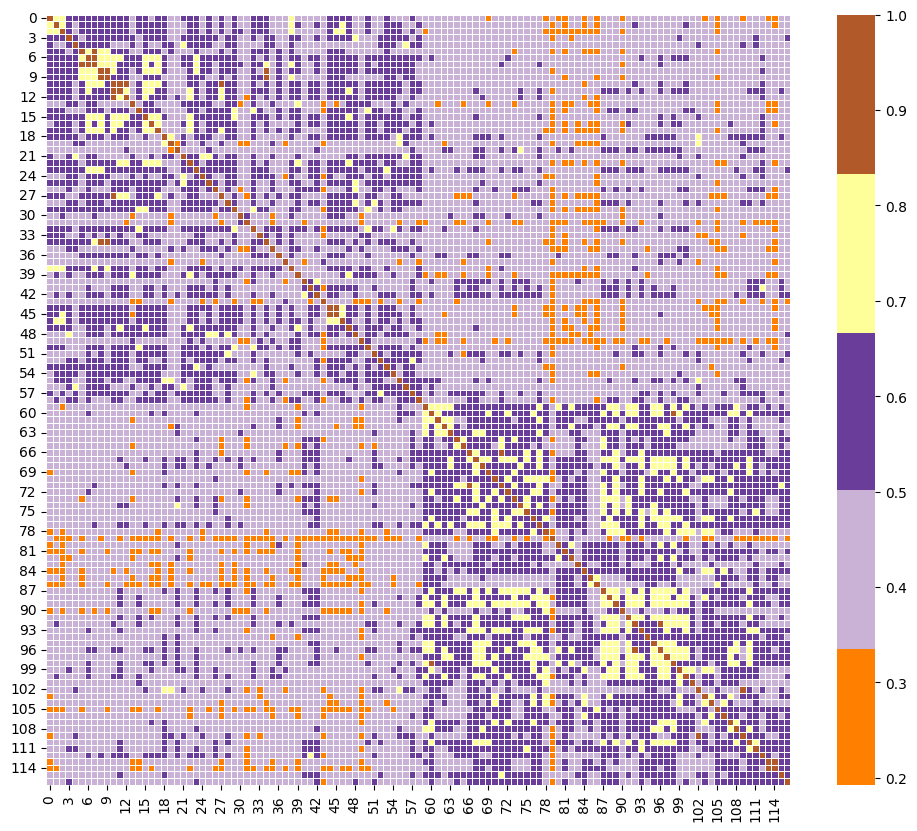

In [39]:
from scipy.stats import pearsonr
import math
import matplotlib.pyplot as plt
import seaborn as sns
pearson_matrix = np.zeros((117, 117))

for i in range(117):
    for j in range(i, 117):  
        corr, _ = pearsonr(image_feature_list.iloc[i, :], image_feature_list.iloc[j, :])
        pearson_matrix[i, j] = corr
        pearson_matrix[j, i] = corr

plt.figure(figsize=(12, 10))  
sns.heatmap(pearson_matrix,cmap='Paired', center=0, annot=False, linewidths=0.5)
plt.show()

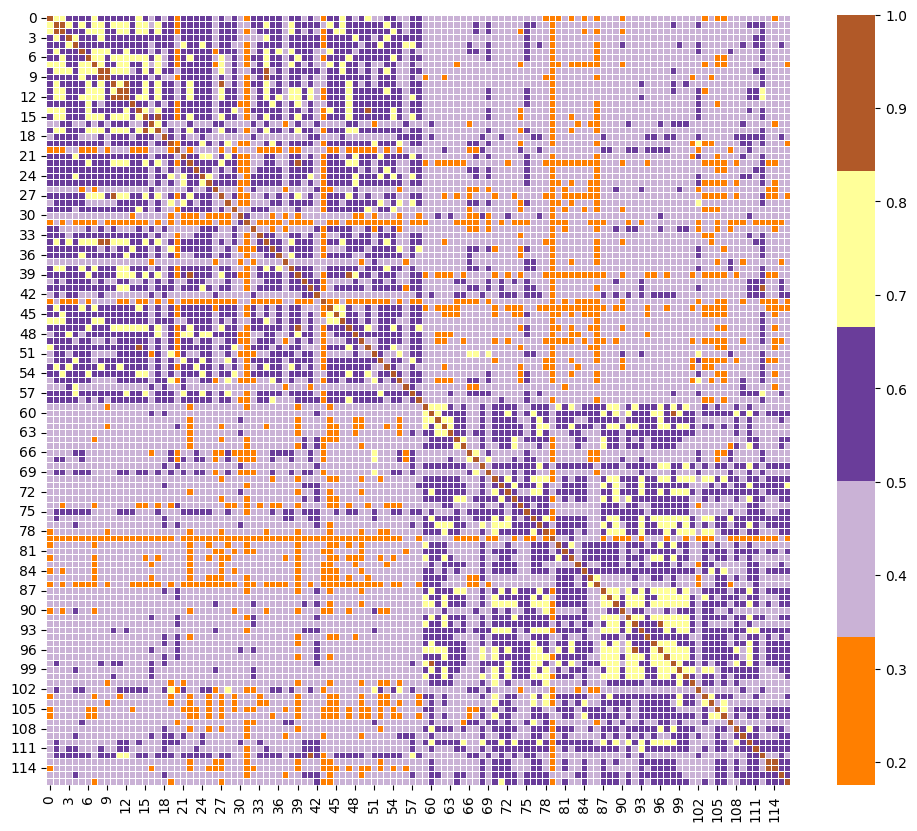

In [40]:
from scipy.stats import pearsonr
import math
import matplotlib.pyplot as plt
import seaborn as sns
pearson_matrix = np.zeros((117, 117))

for i in range(117):
    for j in range(i, 117):  
        corr, _ = pearsonr(image_feature_list_split.iloc[i, :], image_feature_list_split.iloc[j, :])
        pearson_matrix[i, j] = corr
        pearson_matrix[j, i] = corr

plt.figure(figsize=(12, 10))  
sns.heatmap(pearson_matrix,cmap='Paired', center=0, annot=False, linewidths=0.5)
plt.show()

In [ ]:
image_feature_list.index = 'Image_' + image_feature_list.index.astype(str)

In [ ]:
from sklearn.decomposition import PCA
n_components = 20  

pca = PCA(n_components=n_components)

from sklearn.preprocessing import StandardScaler

pca_result = pca.fit_transform(image_feature_list)

pca_result = pd.DataFrame(pca_result)
pca_result.index = image_feature_list.index

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = pca_result.iloc[:, 0],
                y = pca_result.iloc[:, 1])

In [ ]:
from umap import UMAP
umap_model = UMAP(n_components=2, random_state=42)

umap_result = umap_model.fit_transform(pca_result)

umap_df = pd.DataFrame(umap_result, index=image_feature_list.index, columns=['UMAP1', 'UMAP2'])


plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, palette='viridis')
plt.title('UMAP Projection')
plt.show()

In [ ]:
umap_df['cluster'] = "cluster_1"
umap_df.loc[umap_df['UMAP2'] < -1, 'cluster'] = "cluster_2"